# Decision Tree Classification on Titanic Dataset

## Data Loading

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

## Data Preprocessing
- Drop unnecessary columns: We'll drop 'Embarked' and 'Deck' columns
- Handle missing values: We'll fill missing values in the 'Age' and 'Fare' columns using the median.
- Encode categorical variables: We'll convert 'Sex' into numerical values (male = 0, female = 1).
- Drop rows with missing target values: We need to drop rows where the 'Survived' column is missing.

In [16]:
titanic = titanic.drop(columns=['embarked', 'deck'])

titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].median())

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic = titanic.dropna(subset=['survived'])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,0,3,1,28.0,1,2,23.4500,Third,woman,False,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


- Passenger Class: Social class (1st, 2nd, or 3rd).
- Sex: Gender of the passenger (Male/Female).
- Age: Age of the passenger.
- SibSp: Number of siblings/spouses aboard.
- Parch: Number of parents/children aboard.
- Fare: Fare paid by the passenger.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
- Survived: Whether the passenger survived (1) or did not survive (0).

## Apply Decision Tree Algorithm

In [21]:
# selecting features(X) and target variable(y)
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic['survived']
# (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth = 3,random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8097014925373134
Confusion Matrix:
 [[139  18]
 [ 33  78]]


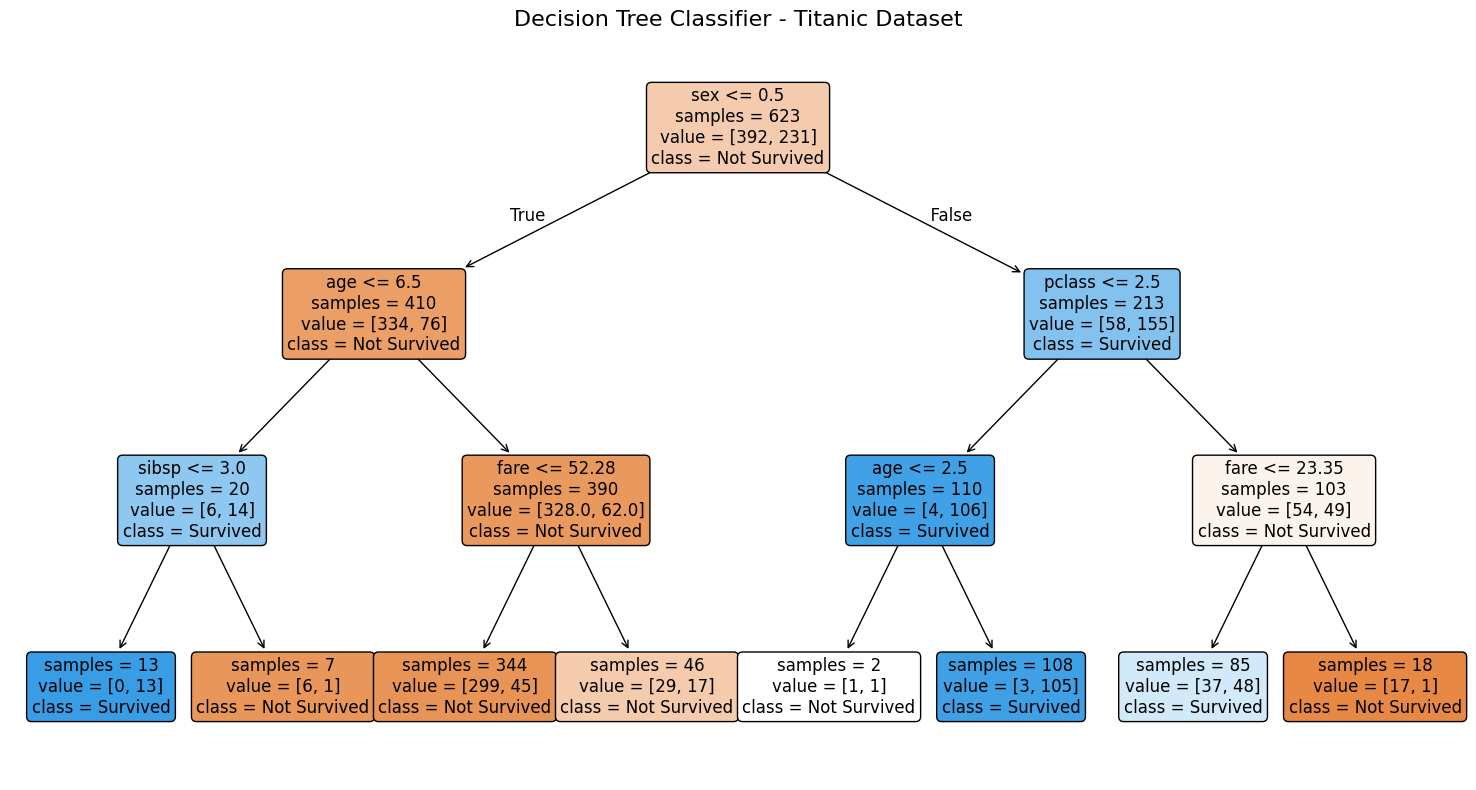

In [23]:
plt.figure(figsize=(15, 8))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['Not Survived', 'Survived'], 
          filled=True, 
          rounded=True, 
          fontsize=12,  
          impurity=False,  
          precision=2,  
          proportion=False)  
plt.title("Decision Tree Classifier - Titanic Dataset", fontsize=16)
plt.tight_layout()
plt.show()

# KNN Classification on Breast Cancer Dataset

## Loading Dataset

**Dataset Attributes:**
- Mean Radius: The mean of distances from the center to points on the perimeter of the mass.
- Mean Texture: The standard deviation of gray-scale values in the image.
- Mean Perimeter: The mean size of the tumor's perimeter.
- Mean Area: The mean area of the tumor.
- Mean Smoothness: The mean of local variation in radius lengths.
etc.

**Target:**
- Malignant (0) - Malignant tumors (dangerous)
- Benign (1) - Benign tumors (non-cancerous)

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9590643274853801

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        64
           1       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



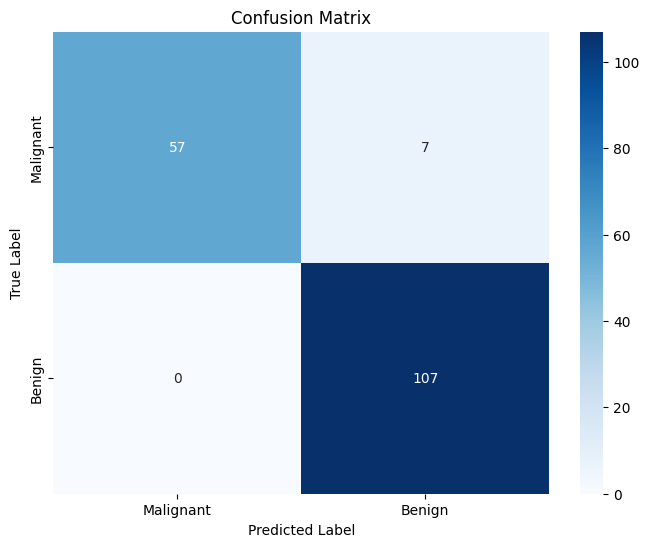

In [5]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()